# Variaciones de reconstrucciones

### En este notebook se observan distintas reconstrucciones del mismo dígito 

In [6]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),"../..")))
from models_definitions.cvae import CVAE
from data.get_data import get_mnist_data

## Definir modelo

In [7]:
# Cargar datos
data = get_mnist_data()

x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  


# Rutas a los modelos
ENCODER_DIR = "../../modelos_entrenados/encoders/"
DECODER_DIR = "../../modelos_entrenados/decoders/"
ORIGINAL_DIM = 28 * 28

# Obtener listas de archivos
encoder_files = sorted(os.listdir(ENCODER_DIR))
decoder_files = sorted(os.listdir(DECODER_DIR))


# Función para extraer clave
def get_key(filename):
    return "_".join(filename.split("_")[2:])  # ej: 'lat_2_mnist.keras'


# Crear diccionarios clave → path
encoders = {
    get_key(f): os.path.join(ENCODER_DIR, f)
    for f in encoder_files
    if f.endswith(".keras")
}
decoders = {
    get_key(f): os.path.join(DECODER_DIR, f)
    for f in decoder_files
    if f.endswith(".keras")
}

# Claves comunes entre encoder y decoder
common_keys = sorted(set(encoders.keys()) & set(decoders.keys()))
print(f"Encontrados {len(common_keys)} pares de modelos.")
#TODO: convertir ese loop en 



Usando mnist como dataset


FileNotFoundError: [Errno 2] No such file or directory: '../../modelos_entrenados/encoders/'

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error
from tqdm import tqdm  # solo si querés barra de progreso

def mse_promedio_por_clase(cvae, x_inputs):
    """
    Calcula el MSE promedio por condición (clase) al reconstruir imágenes.

    Parámetros:
    - cvae: modelo entrenado
    - x_inputs: arreglo de imágenes planas de forma (n, 784)

    Devuelve:
    - mse_por_clase: np.array de shape (10,), cada valor es el MSE promedio para esa condición
    """
    n_clases = 10
    suma_mse = np.zeros(n_clases)
    cantidad = len(x_inputs)

    for x in tqdm(x_inputs, desc="Evaluando condiciones"):
        if x.ndim == 1:
            x = np.expand_dims(x, axis=0)  # (1, 784)
        
        x_repeated = np.repeat(x, repeats=n_clases, axis=0)  # (10, 784)
        condiciones = np.eye(n_clases)  # (10, 10)

        # Codificar y decodificar
        z_mean, z_log_var, z = cvae.encoder.predict([x_repeated, condiciones], verbose=0)
        reconstrucciones = cvae.decoder.predict([z, condiciones], verbose=0)  # (10, 784)

        for i in range(n_clases):
            mse = mean_squared_error(x.flatten(), reconstrucciones[i].flatten())
            suma_mse[i] += mse

    mse_promedio = suma_mse / cantidad
    return mse_promedio



### Dado una imagen se reconstruye con diversas condiciones

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


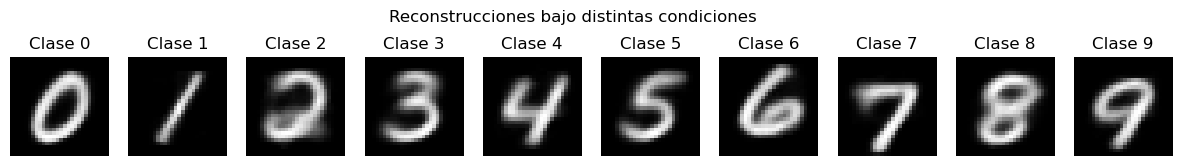

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


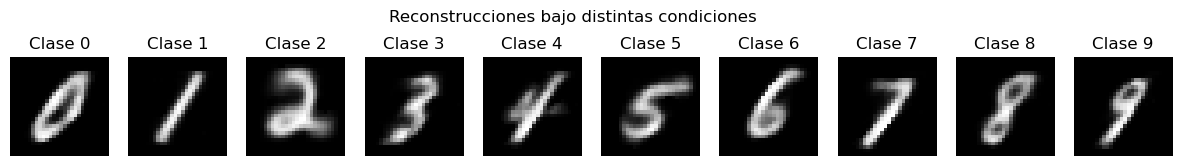

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


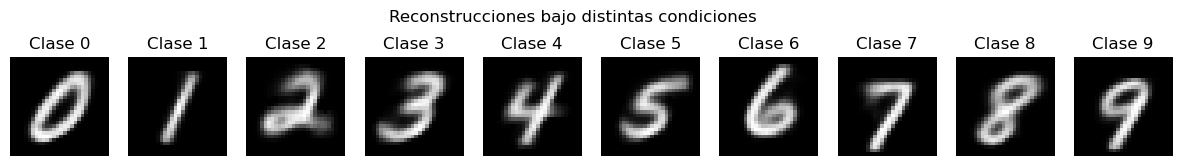

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


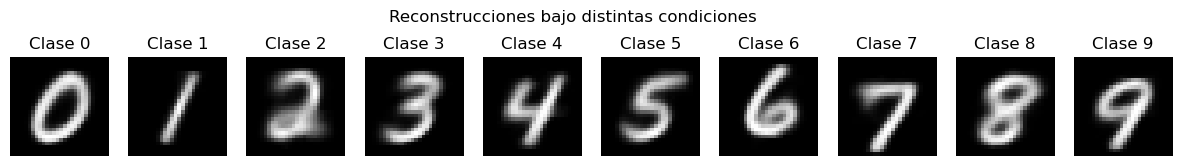

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


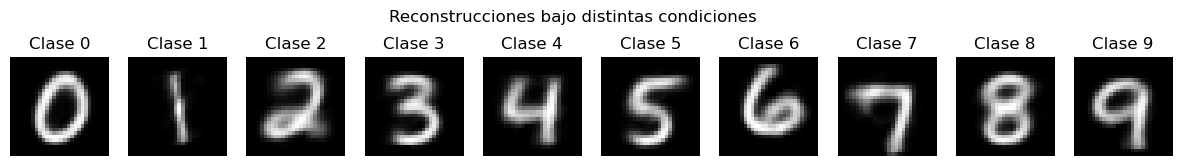

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


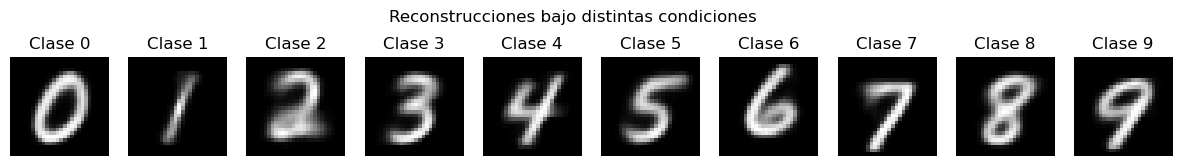

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


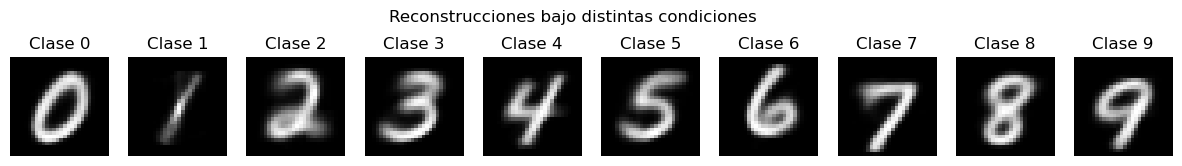

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


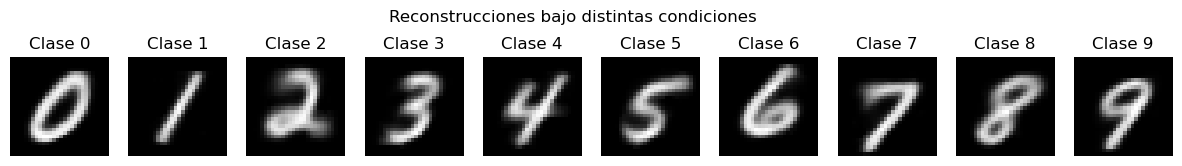

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


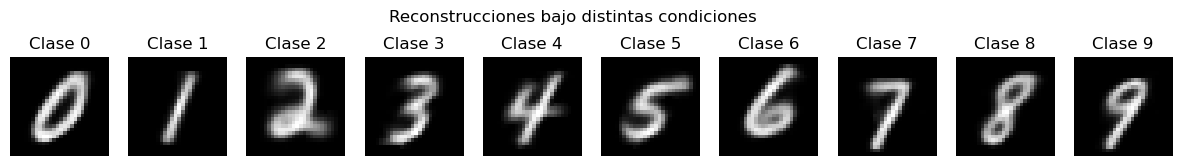

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


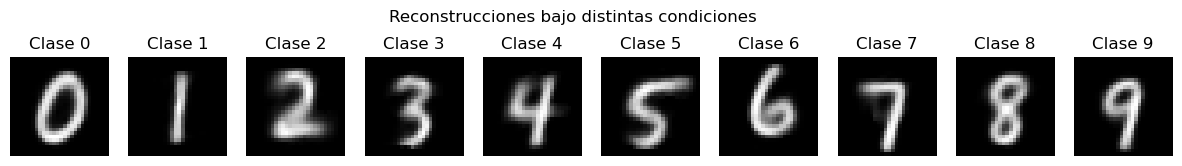

In [3]:
import visualizaciones.visualizar as vis

indices_de_testeo=[1, 3, 5, 7, 2, 0, 13, 15, 17, 4] # inidices donde para que x_train[inidicies] sea 0 1 2 3 4 5 6 7 8 9 0

for i in indices_de_testeo:
    vis.condiciones(cvae,x_train[i]) 

In [18]:
mse_por_clase = mse_promedio_por_clase(cvae, x_test[:1000])  # usa más si querés mayor precisión

for i, mse in enumerate(mse_por_clase):
    print(f"Clase {i}: MSE promedio = {mse:.4f}")


Evaluando condiciones: 100%|██████████| 1000/1000 [03:23<00:00,  4.91it/s]

Clase 0: MSE promedio = 0.0476
Clase 1: MSE promedio = 0.0686
Clase 2: MSE promedio = 0.0418
Clase 3: MSE promedio = 0.0411
Clase 4: MSE promedio = 0.0476
Clase 5: MSE promedio = 0.0446
Clase 6: MSE promedio = 0.0486
Clase 7: MSE promedio = 0.0460
Clase 8: MSE promedio = 0.0407
Clase 9: MSE promedio = 0.0421


Elegir un punto del espacio latente y forzar una reconstrucción de todos los digitos